# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

# Data science and viz
import matplotlib.pyplot as plt # Viz
import pandas as pd # Science
import numpy as np # Science
import requests
import time
import scipy.stats as sc # Viz
from scipy.stats import linregress # Viz
import seaborn as sns # Viz
from pprint import pprint


# Impor the OpenWeatherMap API key
from VHR_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            
            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API returned a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | isla vista
Processing Record 4 of Set 1 | baikonur
Processing Record 5 of Set 1 | guozhen
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | hosanagara
Processing Record 8 of Set 1 | balaipungut
Processing Record 9 of Set 1 | wynyard
Processing Record 10 of Set 1 | fortaleza
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | steinkjer
Processing Record 13 of Set 1 | masterton
Processing Record 14 of Set 1 | ballina
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ad dabbah
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | shizunai-furukawacho
Processing Record 20 of Set 1 | jieshi
Processing Record 21 of Set 1 | sola
Processing Record 22 of Set 1 | waitangi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,70.21,78,100,9.22,AU,1734197600
1,Vila Franca do Campo,37.7167,-25.4333,64.89,99,35,17.02,PT,1734197601
2,Isla Vista,34.4133,-119.8610,61.16,71,0,11.50,US,1734197602
3,Baikonur,45.6167,63.3167,29.44,80,100,12.03,KZ,1734197603
4,Guozhen,34.3659,107.3590,30.00,22,0,2.15,CN,1734197605


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_VHR.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_VHR.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Geraldton,-28.7667,114.6000,70.21,78,100,9.22,AU,1734197600
1,Vila Franca do Campo,37.7167,-25.4333,64.89,99,35,17.02,PT,1734197601
2,Isla Vista,34.4133,-119.8610,61.16,71,0,11.50,US,1734197602
3,Baikonur,45.6167,63.3167,29.44,80,100,12.03,KZ,1734197603
4,Guozhen,34.3659,107.3590,30.00,22,0,2.15,CN,1734197605


In [9]:
# Date Cleaning  Date column to readable format
# Code used from Burundi exercise and Instructor suggestion
city_data_df["Date"] = pd.to_datetime(city_data_df.Date * 1e9)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Geraldton,-28.7667,114.6000,70.21,78,100,9.22,AU,2024-12-14 17:33:20
1,Vila Franca do Campo,37.7167,-25.4333,64.89,99,35,17.02,PT,2024-12-14 17:33:21
2,Isla Vista,34.4133,-119.8610,61.16,71,0,11.50,US,2024-12-14 17:33:22
3,Baikonur,45.6167,63.3167,29.44,80,100,12.03,KZ,2024-12-14 17:33:23
4,Guozhen,34.3659,107.3590,30.00,22,0,2.15,CN,2024-12-14 17:33:25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

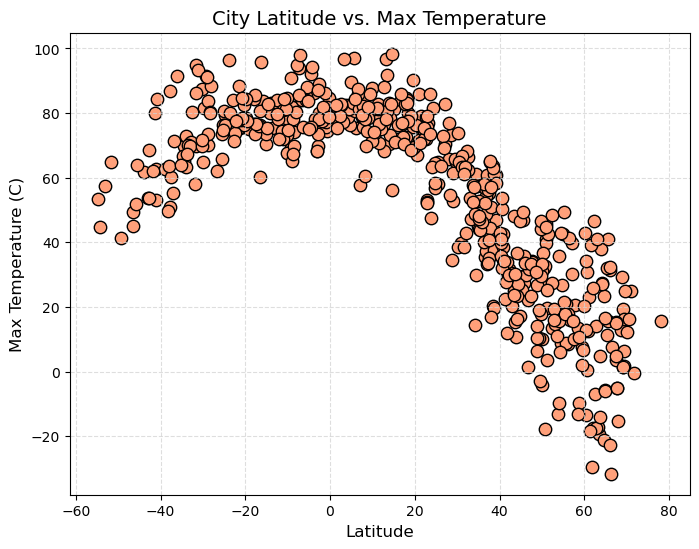

In [28]:
# Build scatter plot for latitude vs. temperature

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='lightsalmon', edgecolor="black", s=80)

# Add labels, title, and grid
plt.title(f"City Latitude vs. Max Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig_1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

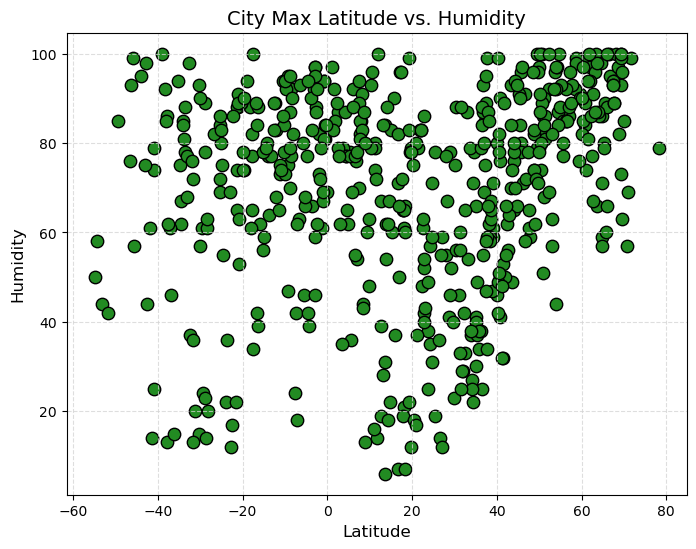

In [27]:
# Build the scatter plots for latitude vs. humidity

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='forestgreen', edgecolor="black", s=80)

# Add labels, title, and grid
plt.title(f"City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig_2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

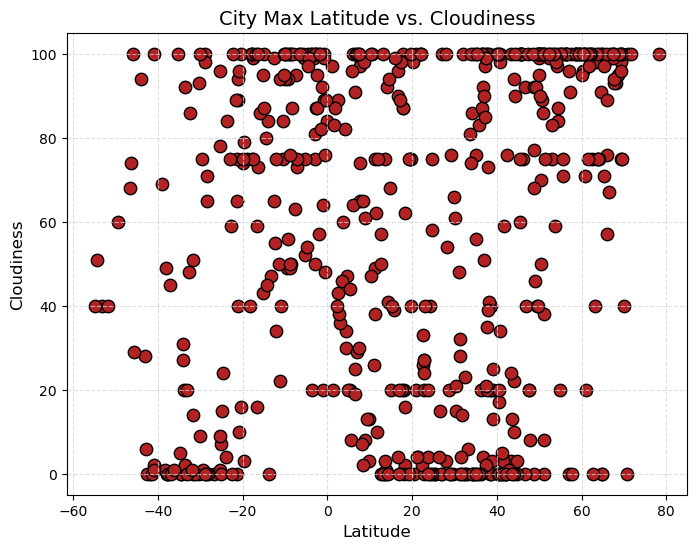

In [13]:
# Build the scatter plots for latitude vs. cloudiness

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='firebrick', edgecolor="black", s=80)

# Add labels, title, and grid
plt.title(f"City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig_3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

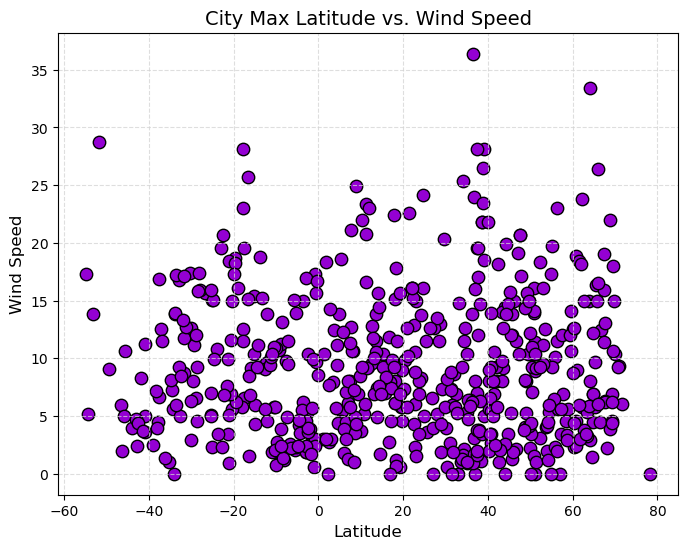

In [14]:
# Build the scatter plots for latitude vs. wind speed

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='darkviolet', edgecolor="black", s=80)

# Add labels, title, and grid
plt.title(f"City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig_4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def regression_plot(x_values, y_values, x_label, y_label, annotation):  
    
    # do regression plot
    # code from Burundi exercise
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(10, 8))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="lightsalmon", edgecolor="black", s=80)
    plt.plot(x_values, regress_values, color="black", linewidth=3) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Show/Save the Graph
    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.info()
northern_hemi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        384 non-null    object        
 1   Lat         384 non-null    float64       
 2   Lng         384 non-null    float64       
 3   Max Temp    384 non-null    float64       
 4   Humidity    384 non-null    int64         
 5   Cloudiness  384 non-null    int64         
 6   Wind Speed  384 non-null    float64       
 7   Country     384 non-null    object        
 8   Date        384 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 27.1+ KB


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca do Campo,37.7167,-25.4333,64.89,99,35,17.02,PT,2024-12-14 17:33:21
1,Isla Vista,34.4133,-119.8610,61.16,71,0,11.50,US,2024-12-14 17:33:22
2,Baikonur,45.6167,63.3167,29.44,80,100,12.03,KZ,2024-12-14 17:33:23
3,Guozhen,34.3659,107.3590,30.00,22,0,2.15,CN,2024-12-14 17:33:25
4,Hosanagara,13.9167,75.0667,70.50,62,1,7.43,IN,2024-12-14 17:33:27


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.info()
southern_hemi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        180 non-null    object        
 1   Lat         180 non-null    float64       
 2   Lng         180 non-null    float64       
 3   Max Temp    180 non-null    float64       
 4   Humidity    180 non-null    int64         
 5   Cloudiness  180 non-null    int64         
 6   Wind Speed  180 non-null    float64       
 7   Country     179 non-null    object        
 8   Date        180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 12.8+ KB


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,70.21,78,100,9.22,AU,2024-12-14 17:33:20
1,Bredasdorp,-34.5322,20.0403,65.07,62,0,7.23,ZA,2024-12-14 17:33:26
2,Wynyard,-41.0000,145.7167,53.19,74,2,5.03,AU,2024-12-14 17:33:29
3,Fortaleza,-3.7227,-38.5247,86.13,66,20,14.97,BR,2024-12-14 17:30:39
4,Masterton,-40.9597,175.6575,62.71,79,100,3.60,NZ,2024-12-14 17:33:34


###  Temperature vs. Latitude Linear Regression Plot

-0.8788086843423909
y = -1.32x + 94.05


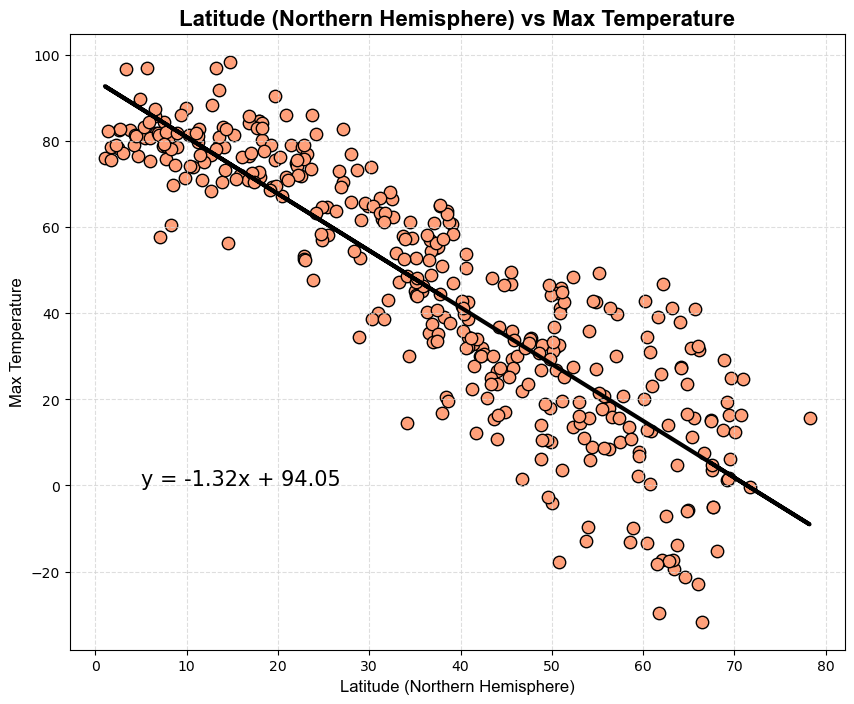

In [18]:
# Linear regression on Northern Hemisphere

# Data for Values (using hemispshere Data Frame)
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude (Northern Hemisphere)"
y_label = "Max Temperature"
annotation = (5, 0)

# Plot
regression_plot(x_values, y_values, x_label, y_label, annotation)

0.5542395218437257
y = 0.42x + 84.07


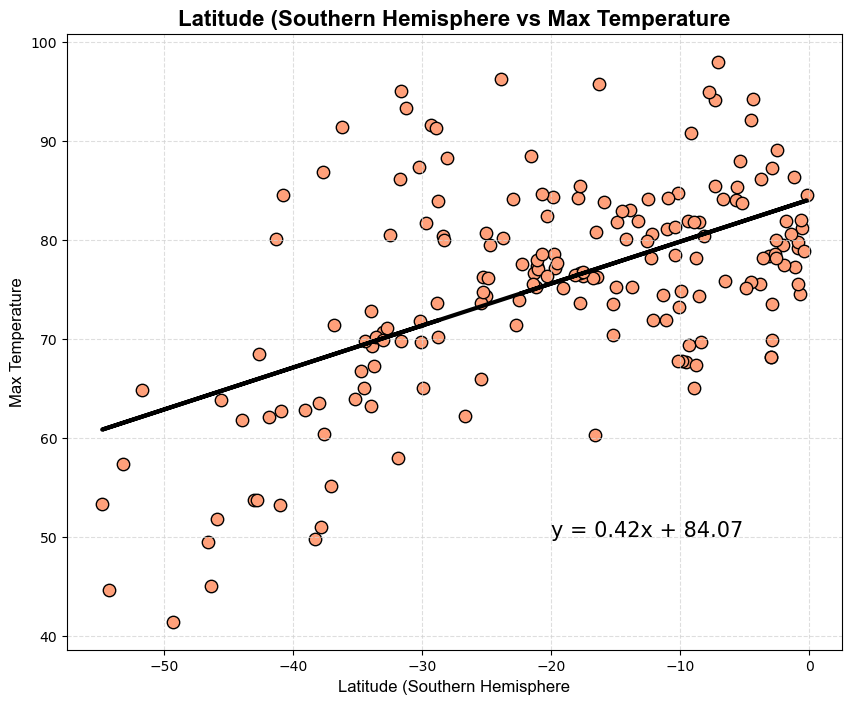

In [19]:
# Linear regression on Southern Hemisphere

# Data for Values (Using Southern Hemisphere Data Fraame)
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude (Southern Hemisphere"
y_label = "Max Temperature"
annotation = (-20, 50)

# Plot
regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
There is a strong correlation between latitude and max Temp in both the Nothern Hemisphere (NH) and southern hemisphere (SH) in which the closer you get to the equator (0 degrees) the highter the Max Temp. The correlation is stronger in the norther hemisphere than the southern hemisphere, but both still showed agreement with the hypothesis. Several factors could've caused bias towards the difference in R values between NH and SH. The SH had a smaller data set, 184 cities vs 396 cities for NH. Also a physical factor such as the tilt of the earth axis could cause a diffrence.

### Humidity vs. Latitude Linear Regression Plot

0.37567012504604036
y = 0.44x + 53.87


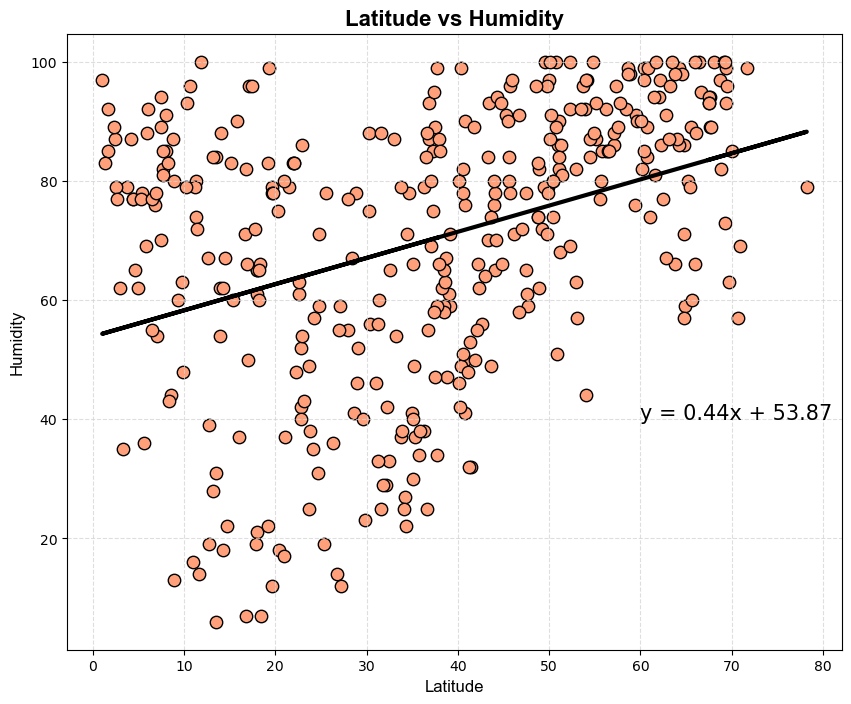

In [20]:
# Linear Regression on Northern Hemisphere

# Values for Data
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (60, 40)

# Plot
regression_plot(x_values, y_values, x_label, y_label, annotation)

0.20950507653333703
y = 0.34x + 76.71


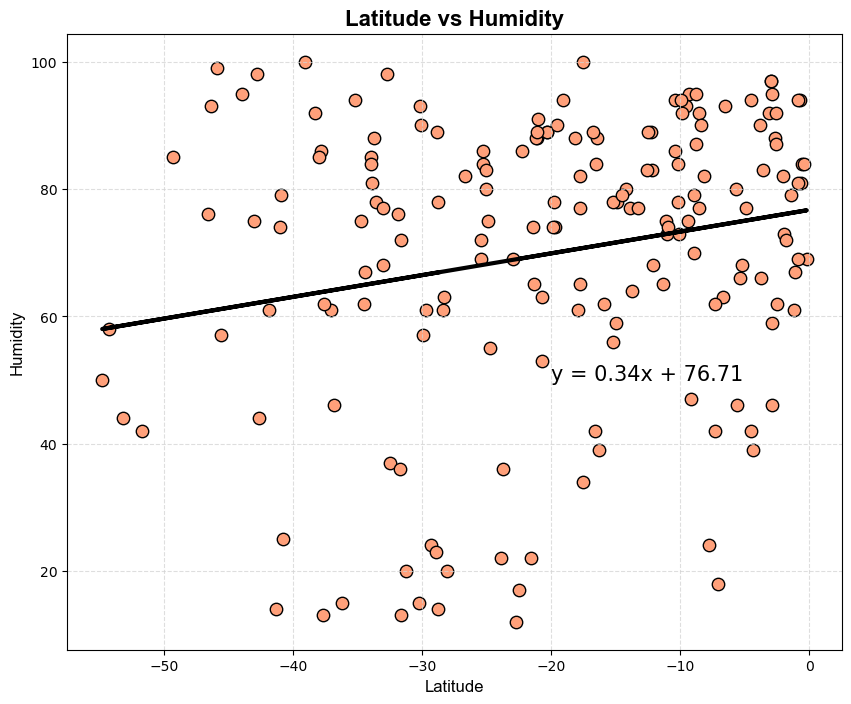

In [21]:
# Linera regression on Southern Hemisphere

# Data for Values
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-20, 50)

# Plot
regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:**
There is a very small correlation between Humidity and Latitude in Northern Hemispheres with an R value of .429. The Southern Hemisphere (SH) had an R vale of 0.237 showing little correlation.

### Cloudiness vs. Latitude Linear Regression Plot

0.32315085290448936
y = 0.66x + 33.4


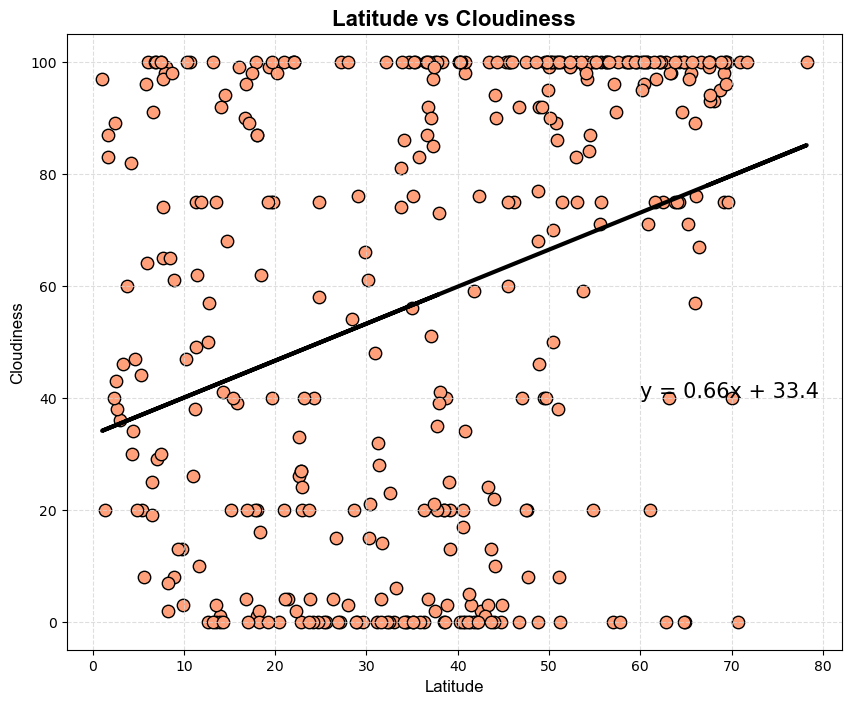

In [22]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (60, 40)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.4943763710069941
y = 1.32x + 85.48


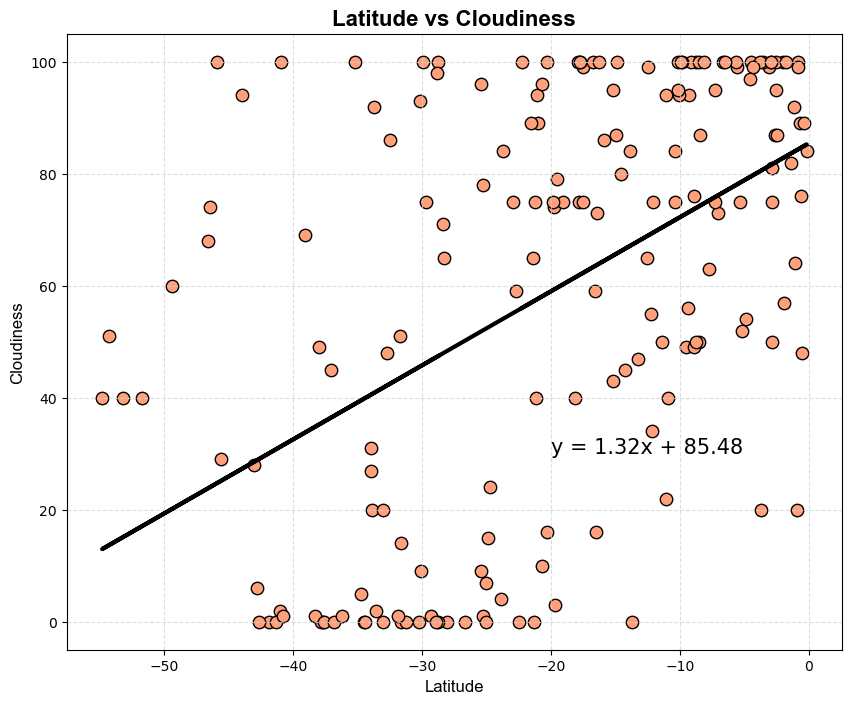

In [23]:
# Linear Regression Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-20, 30)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
A hypothesis for a correlation between cloudiness and Latitude could possibly be suported by the results. Both R values for the Nothern Hemisphere (NH) and Southern Hemoisphere (SH) are close to .50. There is an interesting pattern in the gtraph with clusters of cities spread out through all latitude but having eithere 0, 78, or 100 cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

0.02097240423700201
y = 0.01x + 8.88


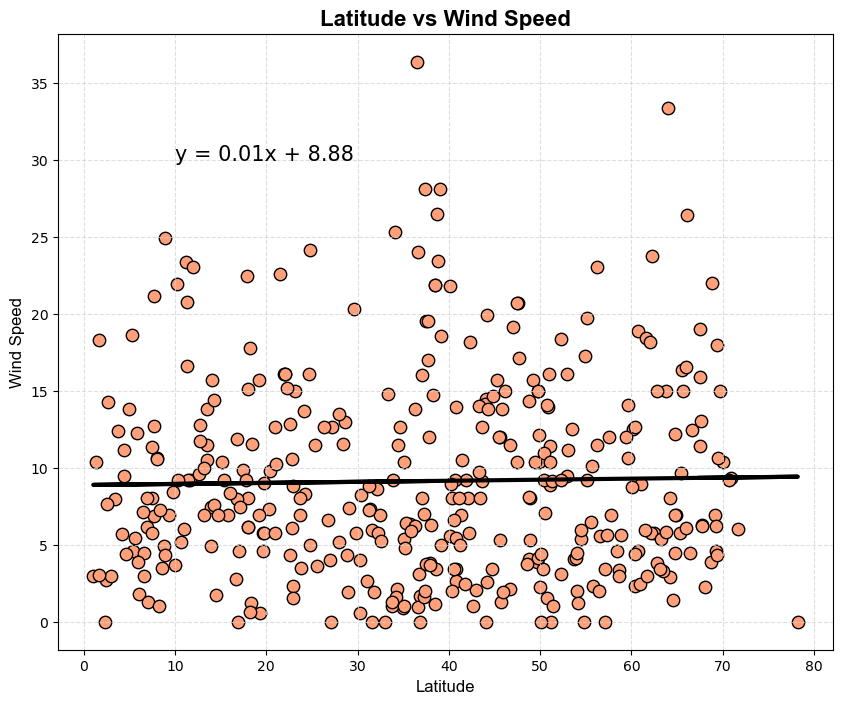

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (10, 30)

regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.152033059112472
y = -0.06x + 7.4


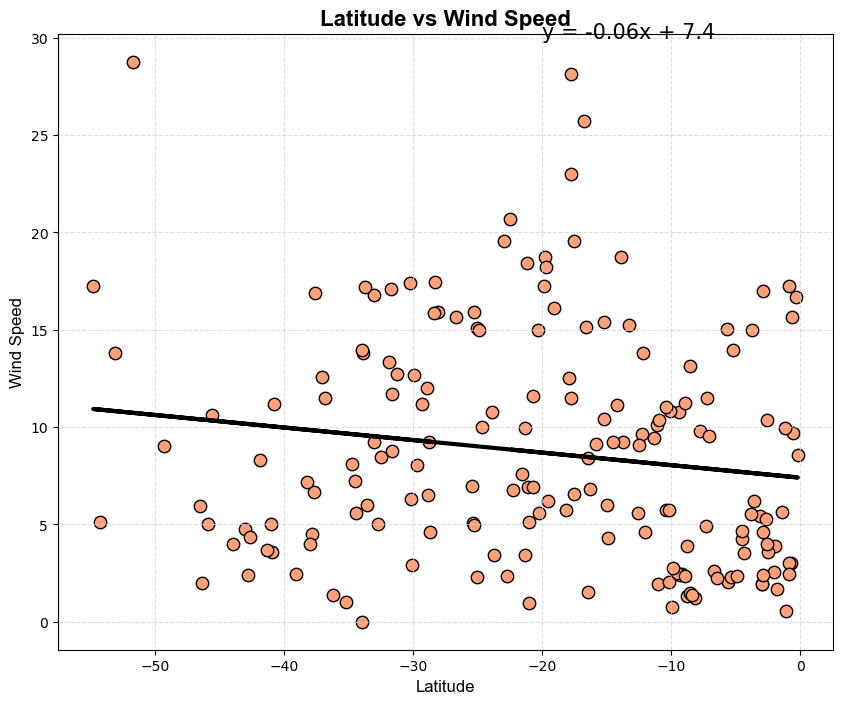

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-20, 30)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
There is a very small correlation between wind speed and Latitude in southern hemisphere only. These results overall show that wind speed is not corraleted to latitude. The slightliy higher R value for SH might be motivation to gather more data over periods of time and better determine any corrlations.